In [1]:
import astropy.units as u
from tdsat_telescope import load_telescope_parameters
from tdsat_sensitivity import src_rate, bgd_sky_qe_rate, bgd_electronics, calc_exposure
from tdsat_neff import get_neff
from duet_filters import optimize_filter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
siglimit = 10. # sigma
read_noise = 3.*(2**0.5) # Read noise for two frames

# Target value
AB = 22*u.ABmag

point_drift = 1*u.arcsec # To be added to the PSF in quadrature
point_jitter = 2*u.arcsec
# Define bands
td1_band = [193, 233]*u.nm


#td1_band = [260, 300]*u.nm



# Transmission efficiency
trans_eff = (0.975)**8 # from Jim. 
reflectivity = 0.80 # From the curve in Jim's slides
filter_target = 0.5

# trans_eff = 1.0
# reflectivity=1.0


print('Transmission efficiency: {}'.format(trans_eff))
print('Reflectivity: {}'.format(reflectivity))


Transmission efficiency: 0.8166518036622619
Reflectivity: 0.8


In [3]:
# Loop for low zodiacal background
siglimit=10.

config = 12
diameter, qe, psf_size, pixel_size, efficiency = load_telescope_parameters(config, diag=False)


# Add pointing drift to the PSF in quadrature.
psf_size = (psf_size**2 + point_drift**2 + point_jitter**2)**0.5


#     print()
#     print('Band Average QE: {}'.format(qe))
#     print('Effective PSF size {}'.format(psf_size))
# Get the number of effective background pixels
neff = get_neff(psf_size, pixel_size)
#     print('Number of effective bgd pixels: {}'.format(neff))
#     print()

all_exp = []
all_rej = []
for filter_target in np.arange(50)*0.5 + 0.5:
    rej = optimize_filter(td1_band[0], td1_band[1], target_ratio = filter_target, blue_filter=False)
    all_rej = np.append(all_rej, rej)
    
    trans_loss = (1 + 0.1 * np.log10(rej))
    # Compute sky background
    bgd_ph_rate = bgd_sky_qe_rate(diag=False,
                                  diameter=diameter,
                                  band=td1_band,filter_target=filter_target,
                                  pixel_size=pixel_size)
    bgd_cps = trans_loss*trans_eff * reflectivity * efficiency * bgd_ph_rate
    print('Target Ratio: {}'.format(filter_target))
    print('Sky background rate per pixel: {}'.format(bgd_cps))
    # Get the source rate:
    src_ph_rate, src_elec_rate = src_rate(diag=False,ABmag=AB,
                                          diameter=diameter)

    src_cps = trans_loss*trans_eff * reflectivity * efficiency *qe* src_ph_rate
    print('Source Photon Rate: {}'.format(src_cps))
    print()
    exposure = calc_exposure(siglimit, src_cps, bgd_cps,read_noise, neff)
    print('Exposure Required: {}'.format(exposure))
    print('---------')
    print()
    print()
    all_exp = np.append(all_exp, exposure)


Target Ratio: 0.5
Sky background rate per pixel: 0.002422827581978019 1 / s
Source Photon Rate: 0.1610850181023931 1 / s

Exposure Required: 833.3468304217026 s
---------


Target Ratio: 1.0
Sky background rate per pixel: 0.0033855766221605023 1 / s
Source Photon Rate: 0.16866505392043 1 / s

Exposure Required: 801.4744566640693 s
---------


Target Ratio: 1.5
Sky background rate per pixel: 0.004345632780838856 1 / s
Source Photon Rate: 0.17309909062810483 1 / s

Exposure Required: 786.3946482130145 s
---------


Target Ratio: 2.0
Sky background rate per pixel: 0.005311496435974813 1 / s
Source Photon Rate: 0.17624508973846692 1 / s

Exposure Required: 777.7241100022558 s
---------


Target Ratio: 2.5
Sky background rate per pixel: 0.0062842006999702885 1 / s
Source Photon Rate: 0.17868531622854553 1 / s

Exposure Required: 772.4097041133116 s
---------


Target Ratio: 3.0
Sky background rate per pixel: 0.007263517444137158 1 / s
Source Photon Rate: 0.18067912644614179 1 / s

Exposure 

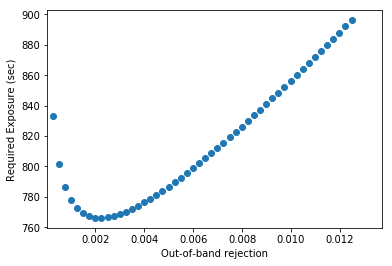

In [4]:
plt.scatter(all_rej, all_exp)
plt.xlim(min(all_rej)*0.1, max(all_rej)*1.1)
plt.ylabel('Required Exposure (sec)')
plt.xlabel('Out-of-band rejection')
plt.show()

In [5]:
# Loop for Medium zodiacal background
siglimit=10.
for config in [11, 12, 13, 14]:

    print()
    diameter, qe, psf_size, pixel_size, efficiency = load_telescope_parameters(config, diag=True)

    
    # Add pointing drift to the PSF in quadrature.
    psf_size = (psf_size**2 + point_drift**2 + point_jitter**2)**0.5


    print()
    print('Effective PSF size {}'.format(psf_size))
    # Get the number of effective background pixels
    neff = get_neff(psf_size, pixel_size)
    print('Number of effective bgd pixels: {}'.format(neff))
    print()

    # Compute sky background
    bgd_ph_rate = bgd_sky_qe_rate(diag=False,med_zodi=True,
                                  diameter=diameter,
                                  band=td1_band,
                                  pixel_size=pixel_size)
    bgd_cps = trans_eff * reflectivity * efficiency * bgd_ph_rate
    print('Sky background rate per pixel: {}'.format(bgd_cps))
    
    # Get the source rate:
    src_ph_rate, src_elec_rate = src_rate(diag=False,ABmag=AB,
                                          diameter=diameter)

    src_cps = trans_eff * reflectivity * efficiency *qe* src_ph_rate
    print('Source Photon Rate: {}'.format(src_cps))
    print()
    exposure = calc_exposure(siglimit, src_cps, bgd_cps,read_noise, neff)
    print('Exposure Required: {}'.format(exposure))
    print('---------')
    print()
    print()




Telescope Configuration 11
Name: Small Focal Plane CMOS
Entrance Pupil diameter 26.0 cm
Optical Effifiency 0.7893639053254439
PSF FWHM 4.288 arcsec
Pixel size 6.4 arcsec
Effective Aperture 23.1 cm
Effective Area 419.09631397051237 cm2

Effective PSF size 4.83600496277661 arcsec
Number of effective bgd pixels: 1.6784996136011912

Sky background rate per pixel: 0.023509532912962868 1 / s
Source Photon Rate: 0.2853421817400859 1 / s

Exposure Required: 476.7554163131319 s
---------



Telescope Configuration 12
Name: Swiss Cross CMOS
Entrance Pupil diameter 30.0 cm
Optical Effifiency 0.5232111111111111
PSF FWHM 2.8800000000000003 arcsec
Pixel size 4.0 arcsec
Effective Aperture 21.7 cm
Effective Area 369.83614116222435 cm2

Effective PSF size 3.6461486530310308 arcsec
Number of effective bgd pixels: 2.2959750546552984

Sky background rate per pixel: 0.008104002069472175 1 / s
Source Photon Rate: 0.25180333944189387 1 / s

Exposure Required: 545.884223463544 s
---------



Telescope Config

In [6]:
# Loop for high zodiacal background
siglimit=10.
for config in [11, 12, 13, 14]:

    print()
    diameter, qe, psf_size, pixel_size, efficiency = load_telescope_parameters(config, diag=True)

    # Add pointing drift to the PSF in quadrature.
    psf_size = (psf_size**2 + point_drift**2 + point_jitter**2)**0.5



    print()
    print('Effective PSF size {}'.format(psf_size))
    # Get the number of effective background pixels
    neff = get_neff(psf_size, pixel_size)
    print('Number of effective bgd pixels: {}'.format(neff))
    print()

    # Compute sky background
    bgd_ph_rate = bgd_sky_qe_rate(diag=False,high_zodi=True,
                                  diameter=diameter,
                                  band=td1_band,
                                  pixel_size=pixel_size)
    bgd_cps = trans_eff * reflectivity * efficiency * bgd_ph_rate
    print('Sky background rate per pixel: {}'.format(bgd_cps))
    
    # Get the source rate:
    src_ph_rate, src_elec_rate = src_rate(diag=False,ABmag=AB,
                                          diameter=diameter)

    src_cps = trans_eff * reflectivity * efficiency *qe* src_ph_rate
    print('Source Photon Rate: {}'.format(src_cps))
    print()
    exposure = calc_exposure(siglimit, src_cps, bgd_cps,read_noise, neff)
    print('Exposure Required: {}'.format(exposure))
    print('---------')
    print()
    print()




Telescope Configuration 11
Name: Small Focal Plane CMOS
Entrance Pupil diameter 26.0 cm
Optical Effifiency 0.7893639053254439
PSF FWHM 4.288 arcsec
Pixel size 6.4 arcsec
Effective Aperture 23.1 cm
Effective Area 419.09631397051237 cm2

Effective PSF size 4.83600496277661 arcsec
Number of effective bgd pixels: 1.6784996136011912

Sky background rate per pixel: 0.12810237338095642 1 / s
Source Photon Rate: 0.2853421817400859 1 / s

Exposure Required: 669.9329662339885 s
---------



Telescope Configuration 12
Name: Swiss Cross CMOS
Entrance Pupil diameter 30.0 cm
Optical Effifiency 0.5232111111111111
PSF FWHM 2.8800000000000003 arcsec
Pixel size 4.0 arcsec
Effective Aperture 21.7 cm
Effective Area 369.83614116222435 cm2

Effective PSF size 3.6461486530310308 arcsec
Number of effective bgd pixels: 2.2959750546552984

Sky background rate per pixel: 0.04415833793155241 1 / s
Source Photon Rate: 0.25180333944189387 1 / s

Exposure Required: 656.3462997258237 s
---------



Telescope Configu

In [7]:
#### Loop for high zodiacal background, 5-sigma
siglimit=5.0
for config in [11, 12, 13, 14]:
    print()
    diameter, qe, psf_size, pixel_size, efficiency = load_telescope_parameters(config, diag=True)

    # Add pointing drift to the PSF in quadrature.
    psf_size = (psf_size**2 + point_drift**2 + point_jitter**2)**0.5



    print()
    print('Effective PSF size {}'.format(psf_size))
    # Get the number of effective background pixels
    neff = get_neff(psf_size, pixel_size)
    print('Number of effective bgd pixels: {}'.format(neff))
    print()

    # Compute sky background
    bgd_ph_rate = bgd_sky_qe_rate(diag=False,high_zodi=True,
                                  diameter=diameter,
                                  band=td1_band,
                                  pixel_size=pixel_size)
    bgd_cps = trans_eff * reflectivity * efficiency * bgd_ph_rate
    print('Sky background rate per pixel: {}'.format(bgd_cps))
    
    # Get the source rate:
    src_ph_rate, src_elec_rate = src_rate(diag=False,ABmag=AB,
                                          diameter=diameter)

    src_cps = trans_eff * reflectivity * efficiency *qe* src_ph_rate
    print('Source Photon Rate: {}'.format(src_cps))
    print()
    exposure = calc_exposure(siglimit, src_cps, bgd_cps,read_noise, neff)
    print('Exposure Required: {}'.format(exposure))
    print('---------')
    print()
    print()




Telescope Configuration 11
Name: Small Focal Plane CMOS
Entrance Pupil diameter 26.0 cm
Optical Effifiency 0.7893639053254439
PSF FWHM 4.288 arcsec
Pixel size 6.4 arcsec
Effective Aperture 23.1 cm
Effective Area 419.09631397051237 cm2

Effective PSF size 4.83600496277661 arcsec
Number of effective bgd pixels: 1.6784996136011912

Sky background rate per pixel: 0.12810237338095642 1 / s
Source Photon Rate: 0.2853421817400859 1 / s

Exposure Required: 200.0163620656519 s
---------



Telescope Configuration 12
Name: Swiss Cross CMOS
Entrance Pupil diameter 30.0 cm
Optical Effifiency 0.5232111111111111
PSF FWHM 2.8800000000000003 arcsec
Pixel size 4.0 arcsec
Effective Aperture 21.7 cm
Effective Area 369.83614116222435 cm2

Effective PSF size 3.6461486530310308 arcsec
Number of effective bgd pixels: 2.2959750546552984

Sky background rate per pixel: 0.04415833793155241 1 / s
Source Photon Rate: 0.25180333944189387 1 / s

Exposure Required: 215.03749812981187 s
---------



Telescope Config

In [8]:
x = False
if x:
    print('yes')